In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

## USGS data

In [2]:
# import marion 35 data set
ma_35 = pd.read_csv('Data/USGS_MA35.csv')
ma_35.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  3611 non-null   object 
 1   gwl_max   3611 non-null   float64
 2   gwl_min   3611 non-null   float64
dtypes: float64(2), object(1)
memory usage: 84.8+ KB


In [3]:
# set the data type of the 'datetime' column to datetime
ma_35['datetime'] = pd.to_datetime(ma_35['datetime']).dt.date
ma_35['datetime'] = pd.to_datetime(ma_35['datetime'])

In [4]:
# replace 'min' and 'max' measurements with 'median' and 'half-range'
ma_35['gwl_median'] = (ma_35['gwl_max'] + ma_35['gwl_min']) / 2
ma_35['gwl_hr'] = ma_35['gwl_max'] - ma_35['gwl_median']
ma_35 = ma_35.drop(columns=['gwl_min', 'gwl_max'])
ma_35.columns = ['date', 'gwl_median', 'gwl_hr']

In [5]:
ma_35.head()

,date,gwl_median,gwl_hr
0,2015-01-01,33.000,0.120
1,2015-01-02,32.925,0.075
2,2015-01-03,32.910,0.110
3,2015-01-04,32.850,0.060
4,2015-01-05,32.935,0.115


In [6]:
# import marion 39 data set
ma_39 = pd.read_csv('Data/USGS_MA39.csv')
ma_39.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  3570 non-null   object 
 1   gwl_max   3570 non-null   float64
 2   gwl_min   3570 non-null   float64
dtypes: float64(2), object(1)
memory usage: 83.8+ KB


In [7]:
# set the data type of the 'datetime' column to datetime
ma_39['datetime'] = pd.to_datetime(ma_39['datetime']).dt.date
ma_39['datetime'] = pd.to_datetime(ma_39['datetime'])

In [8]:
# replace 'min' and 'max' measurements with 'median' and 'half-range'
ma_39['gwl_median'] = (ma_39['gwl_max'] + ma_39['gwl_min']) / 2
ma_39['gwl_hr'] = ma_39['gwl_max'] - ma_39['gwl_median']
ma_39 = ma_39.drop(columns=['gwl_min', 'gwl_max'])
ma_39.columns = ['date', 'gwl_median', 'gwl_hr']

In [9]:
ma_39.head()

,date,gwl_median,gwl_hr
0,2015-01-01,17.335,0.125
1,2015-01-02,17.455,0.035
2,2015-01-03,17.235,0.235
3,2015-01-04,16.710,0.290
4,2015-01-05,16.105,0.315


## NOAA data

In [10]:
# import NOAA data set
noaa_ind = pd.read_csv('Data/NOAA_IND.csv')
noaa_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  7306 non-null   object 
 1   NAME     7306 non-null   object 
 2   DATE     7306 non-null   object 
 3   PRCP     7289 non-null   float64
 4   TAVG     3654 non-null   float64
 5   TMAX     7298 non-null   float64
 6   TMIN     7302 non-null   float64
dtypes: float64(4), object(3)
memory usage: 399.7+ KB


In [11]:
# clean noaa data set
noaa_ind = noaa_ind.drop(columns=['NAME','TAVG'])
noaa_ind = noaa_ind.rename(columns={'STATION':'id', 'DATE':'date', 'PRCP':'prcp'})
# replace 'min' and 'max' temperature measurements with 'median' and 'half-range'
noaa_ind['t_median'] = (noaa_ind['TMAX'] + noaa_ind['TMIN']) / 2
noaa_ind['t_hr'] = (noaa_ind['TMAX'] - noaa_ind['t_median'])
noaa_ind = noaa_ind.drop(columns=['TMIN','TMAX'])
# fix the date format
noaa_ind['date'] = pd.to_datetime(noaa_ind['date']).dt.date
noaa_ind['date'] = pd.to_datetime(noaa_ind['date'])
noaa_ind.head()

,id,date,prcp,t_median,t_hr
0,USW00093819,2015-01-01,0.00,26.0,8.0
1,USW00093819,2015-01-02,0.00,32.0,7.0
2,USW00093819,2015-01-03,0.79,42.5,9.5
3,USW00093819,2015-01-04,0.01,28.0,16.0
4,USW00093819,2015-01-05,0.11,9.0,5.0


In [12]:
# fill missing percipitation values with 0
noaa_ind['prcp'] = noaa_ind['prcp'].fillna(0)
# fill missing temperature values with approximated values
cols = ['t_median', 't_hr']

for col in cols:
    noaa_ind[col] = noaa_ind[col].interpolate(method='linear', limit_direction='both')
    
noaa_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        7306 non-null   object        
 1   date      7306 non-null   datetime64[ns]
 2   prcp      7306 non-null   float64       
 3   t_median  7306 non-null   float64       
 4   t_hr      7306 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 285.5+ KB


In [13]:
noaa_ind.to_csv('Data/NOAA_CLN.csv', index=False)

## Combine Ground Water Level data with Temperature and Percipitation data into one dataframe

In [14]:
# split noaa dataframe since it contains data for 2 stations
noaa_35 = noaa_ind[noaa_ind['id'] == 'USW00093819']
noaa_35 = noaa_35.drop(columns=['id'])
noaa_39 = noaa_ind[noaa_ind['id'] == 'USW00053842']
noaa_39 = noaa_39.drop(columns=['id'])
# Merge noaa_35 with ma_35 on 'date'
marion35 = pd.merge(noaa_35, ma_35, on='date', how='outer')

# Merge noaa_y with ma_39 on 'date'
marion39 = pd.merge(noaa_39, ma_39, on='date', how='outer')


In [15]:
# fill missing gwl values with approximated values in marion35
cols = ['gwl_median', 'gwl_hr']

for col in cols:
    marion35[col] = marion35[col].interpolate(method='linear', limit_direction='both')
    
marion35.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654 entries, 0 to 3653
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3654 non-null   datetime64[ns]
 1   prcp        3654 non-null   float64       
 2   t_median    3654 non-null   float64       
 3   t_hr        3654 non-null   float64       
 4   gwl_median  3654 non-null   float64       
 5   gwl_hr      3654 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 199.8 KB


In [16]:
# fill missing precipitation values with 0
marion39['prcp'] = marion39['prcp'].fillna(0)
# fill missing values with approximated values in marion39
cols = ['gwl_median', 'gwl_hr','t_median', 't_hr']
for col in cols:
    marion39[col] = marion39[col].interpolate(method='linear', limit_direction='both')
    
marion39.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654 entries, 0 to 3653
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3654 non-null   datetime64[ns]
 1   prcp        3654 non-null   float64       
 2   t_median    3654 non-null   float64       
 3   t_hr        3654 non-null   float64       
 4   gwl_median  3654 non-null   float64       
 5   gwl_hr      3654 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 199.8 KB


In [17]:
marion35 = marion35.sort_values(by='date')
marion35.to_csv('Data/Cleaned_MA35.csv', index=False)

marion39 = marion39.sort_values(by='date')
marion39.to_csv('Data/Cleaned_MA39.csv', index=False)

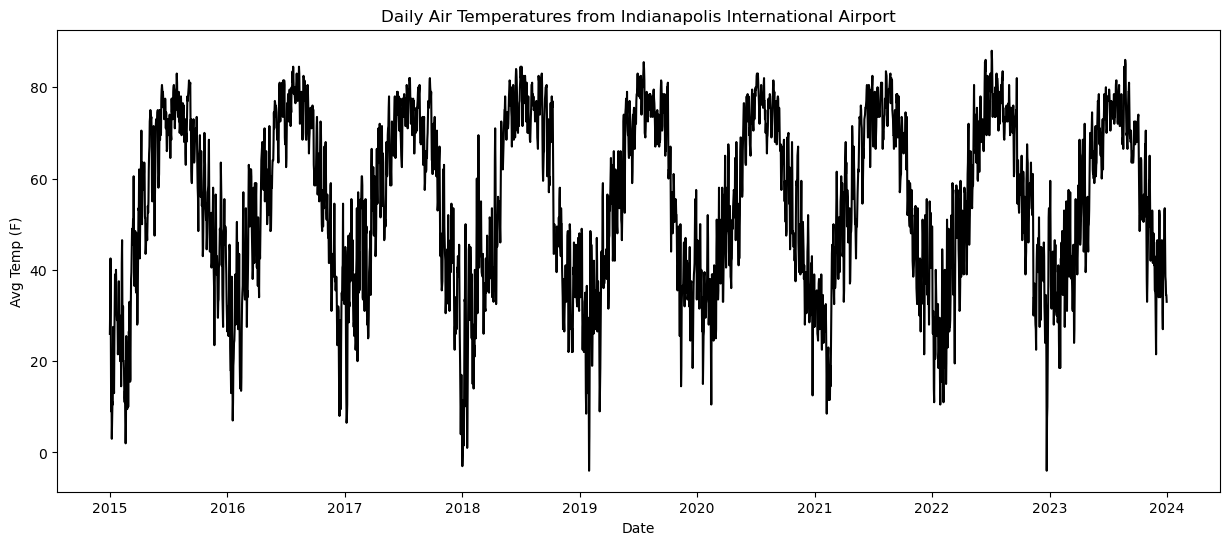

In [18]:
marion35 = marion35[marion35['date'].dt.year < 2024]
plt.figure(figsize=(15, 6))
plt.plot(marion35['date'], marion35['t_median'], color='black')
plt.title('Daily Air Temperatures from Indianapolis International Airport')
plt.xlabel('Date')
plt.ylabel('Avg Temp (F)')
plt.show()

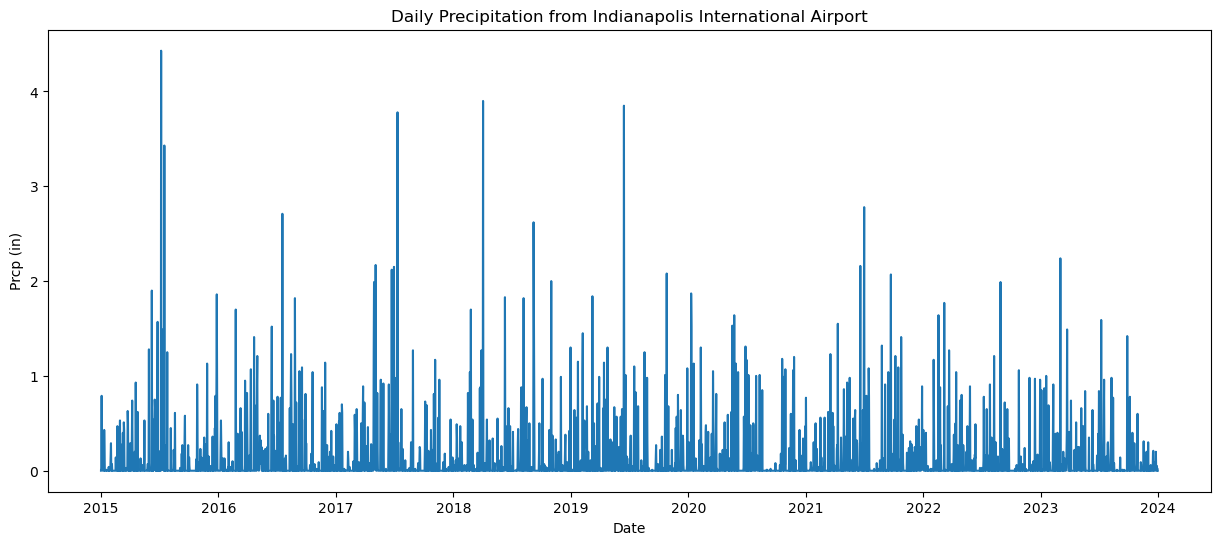

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(marion35['date'], marion35['prcp'])
plt.title('Daily Precipitation from Indianapolis International Airport')
plt.xlabel('Date')
plt.ylabel('Prcp (in)')
plt.show()

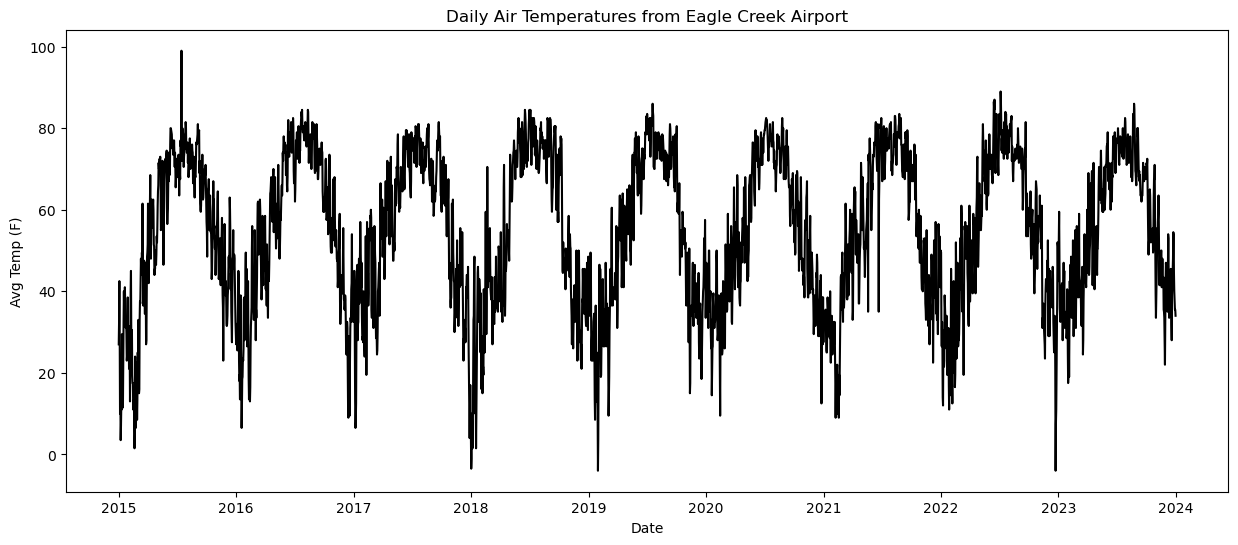

In [20]:
marion39 = marion39[marion39['date'].dt.year < 2024]
plt.figure(figsize=(15, 6))
plt.plot(marion39['date'], marion39['t_median'], color='black')
plt.title('Daily Air Temperatures from Eagle Creek Airport')
plt.xlabel('Date')
plt.ylabel('Avg Temp (F)')
plt.show()

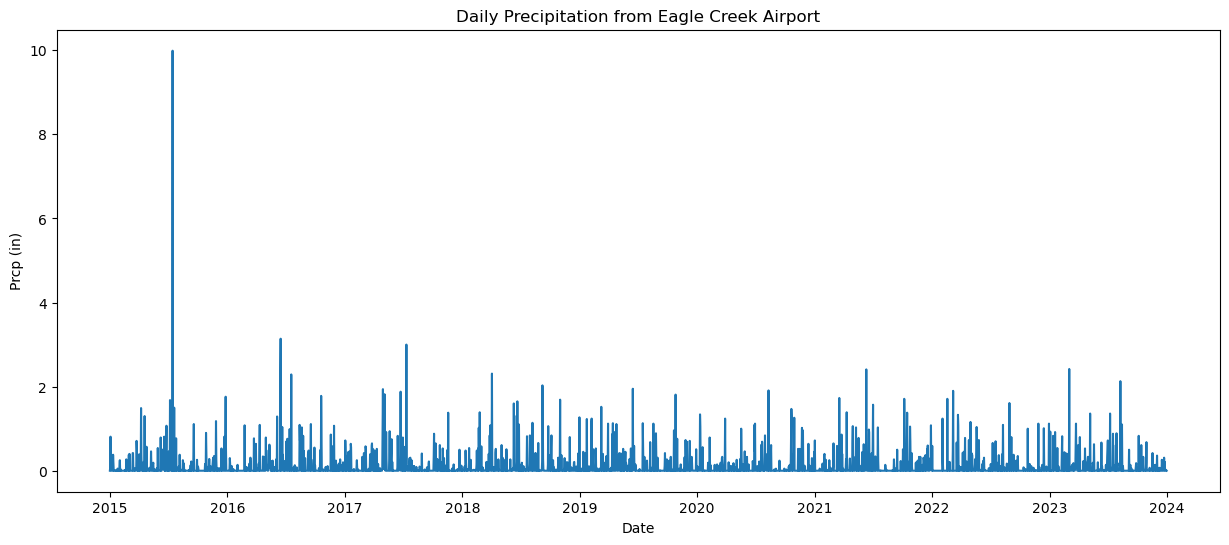

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(marion39['date'], marion39['prcp'])
plt.title('Daily Precipitation from Eagle Creek Airport')
plt.xlabel('Date')
plt.ylabel('Prcp (in)')
plt.show()

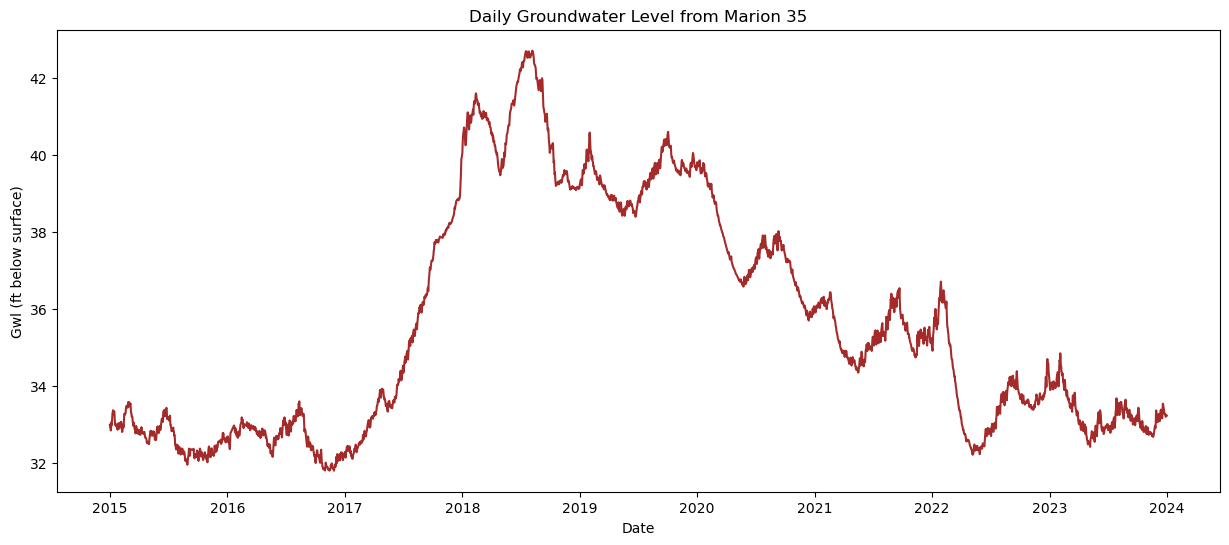

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(marion35['date'], marion35['gwl_median'], color='brown')
plt.title('Daily Groundwater Level from Marion 35')
plt.xlabel('Date')
plt.ylabel('Gwl (ft below surface)')
plt.show()

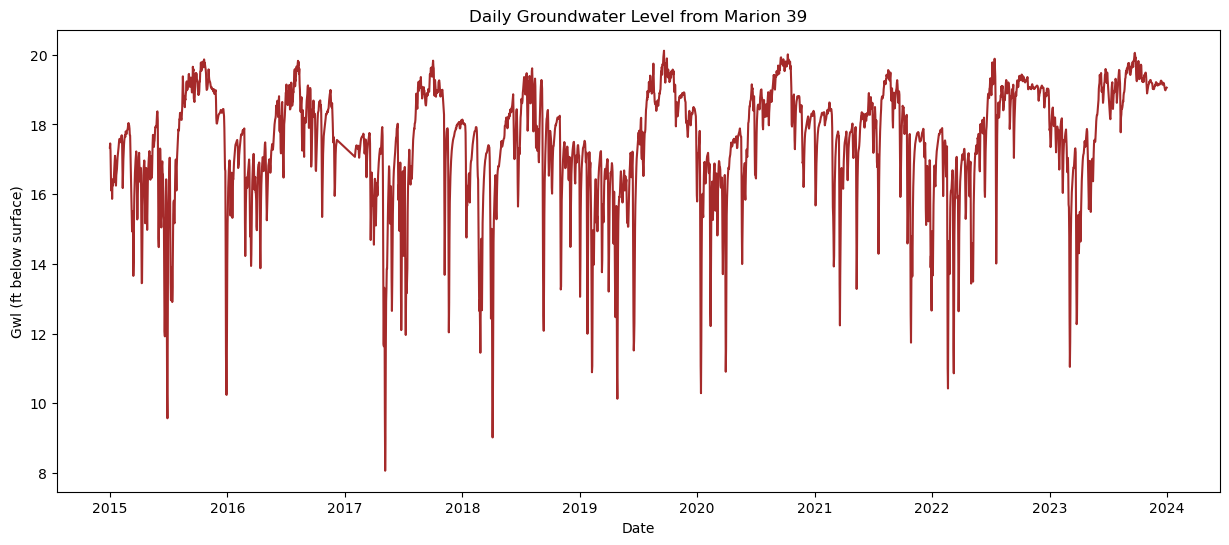

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(marion39['date'], marion39['gwl_median'], color='brown')
plt.title('Daily Groundwater Level from Marion 39')
plt.xlabel('Date')
plt.ylabel('Gwl (ft below surface)')
plt.show()